# Fake News Detection

**Author**: Marcelo Scatena
***
March 2022

<img src='./images/The_fin_de_siecle_newspaper_proprietor.jpg' width=1000 align='left'/>

[Image Source](https://en.wikipedia.org/wiki/Fake_news#/media/File:The_fin_de_si%C3%A8cle_newspaper_proprietor_(cropped).jpg)

# Table of Contents
* [Overview](#Overview)
* [Business Problem](#Business_Problem)
* [Data Understanding](#Data_Understanding)
* [I. Data Exploration](#Data_Exploration)
    * [Text Preprocessing](#Text_Preprocessing)
    * [Word Clouds](#Wordclouds)
    * [Word Vectorization](#Vectorization)
* [II. Data Modeling](#Data_Modeling)    
    * [Classification Models](#Classification)
    * [Neural Network](#Neural_Network)
    * [Clustering](#Clustering)
    * [LDA](#LDA)
* [III. Final Model](#Final_Model)
* [IV. Results](#Results)
* [V. Recommendations](#Recommendations)
* [Next Steps](#Next_Steps)
* [Contact Us](#Contact)

# Overview <a class="anchor" id="Overview"></a>
We are digital brand advisors that have been hired by South by Southwest. Our goal in this analysis is to do a proof of concept measure of the effect of the Apple pop up tent on twitter sentiment at the 2011 SXSW festival. In 2011, Apple released the iPad 2 at the SXSW festival which makes this an ideal situation for analyzing first impressions of a small group of people.

- Attendees of technology festivals usually have a strong social presence
- First impressions of products can influence a great deal in sale numbers
- Sentiment analysis can help companies understand what they're doing right, and what they need to improve

# Business Problem <a class="anchor" id="Business_problem"></a>
South by Southwest is primarily a film and music event and may not have expertise in analyzing social media postings but this measure of sentiment could help determine how much the event charges for booths, advertisements, and other commercial exposures. We are examining how effectively we can measure sentiment during such an event. To accomplish this task we used a Machine Learning model that uses Natural Language Processing and distinguishes between positive, negative, or neutral sentiment in a tweet. The focus though is on being able to classify the highest amount of Negative sentiments, since they are the ones that may influence others that are still undecided on purchasing a product.


# Data Understanding <a class="anchor" id="Data_Understanding"></a>
The information we have is regarding the 2011 South by Southwest festival that introduced the iPad 2. It is from data.world, which can be found [here](https://data.world/crowdflower/brands-and-product-emotions). It contains over 9,000 tweets from users talking about the festival and it's products, and the sentiment of the tweet has been categorized by it being either positive, negative, neutral or unable to tell. There is a big imbalance of results in that regard, and another one when taking into consideration which products those sentiments are regarding.

# I. Data Exploration <a class="anchor" id="Data_Exploration"></a>
To start with, we load the dataset and explore its values.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
col_names = ['ID', 'label', 'statement', 'subject', 'speaker', 'speaker\'s title', 'state', 'party', 'barely true', 'false', 'half true', 'mostly true', 'pants on fire', 'context', 'justification']
raw_train = pd.read_csv('data/train2.tsv', sep='\t', names=col_names)
raw_test = pd.read_csv('data/test2.tsv', sep='\t', names=col_names)
raw_val = pd.read_csv('data/val2.tsv', sep='\t', names=col_names)

In [4]:
raw_train.head()

,ID,label,statement,subject,speaker,speaker's title,state,party,barely true,false,half true,mostly true,pants on fire,context,justification
0.0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,That's a premise that he fails to back up. Ann...
1.0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
2.0,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
3.0,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
4.0,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."


In [5]:
raw_train['label'].value_counts()

half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: label, dtype: int64

In [6]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10242 entries, 0.0 to 10268.0
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10240 non-null  object 
 1   label            10240 non-null  object 
 2   statement        10240 non-null  object 
 3   subject          10238 non-null  object 
 4   speaker          10238 non-null  object 
 5   speaker's title  7343 non-null   object 
 6   state            8032 non-null   object 
 7   party            10238 non-null  object 
 8   barely true      10238 non-null  float64
 9   false            10238 non-null  float64
 10  half true        10238 non-null  float64
 11  mostly true      10238 non-null  float64
 12  pants on fire    10238 non-null  float64
 13  context          10138 non-null  object 
 14  justification    10154 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.3+ MB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

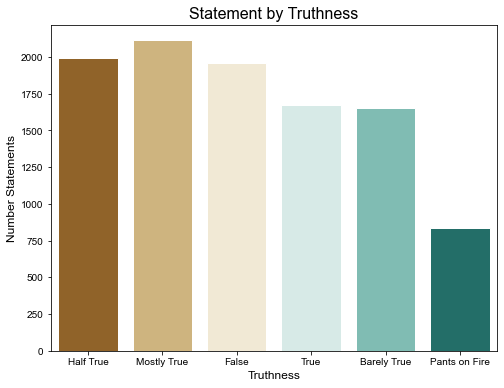

In [8]:
# Visualize the count of classes of target variable
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='label', data=raw_train, palette='BrBG')
ax.set_title('Statement by Truthness', fontsize=16)
ax.set_xlabel('Truthness', fontsize=12)
ax.set_xticklabels(['Half True', 'Mostly True', 'False', 'True', 'Barely True', 'Pants on Fire'])
ax.set_ylabel('Number Statements', fontsize=12);

In [9]:
raw_train.isna().sum()

ID                    2
label                 2
statement             2
subject               4
speaker               4
speaker's title    2899
state              2210
party                 4
barely true           4
false                 4
half true             4
mostly true           4
pants on fire         4
context             104
justification        88
dtype: int64

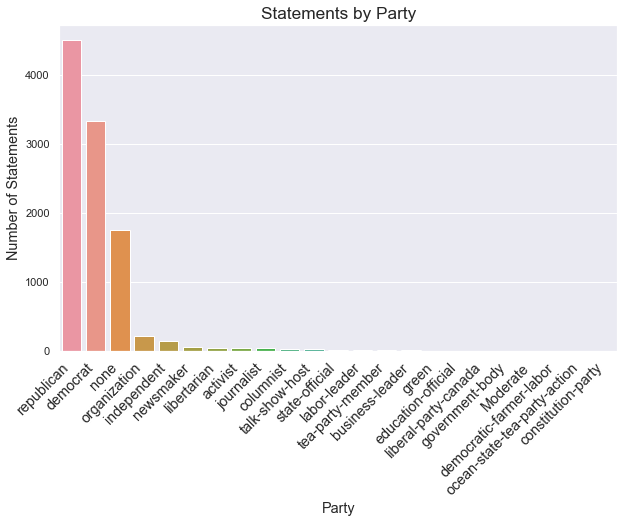

In [10]:
#visualize the counts of statements by party

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.countplot(
    data=raw_train, 
    x="party", order=raw_train["party"].value_counts().index)

ax.set_title('Statements by Party', fontsize='x-large')
ax.set_xlabel('Party',fontsize='large')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light', fontsize='large')
ax.set_ylabel('Number of Statements',fontsize='large');

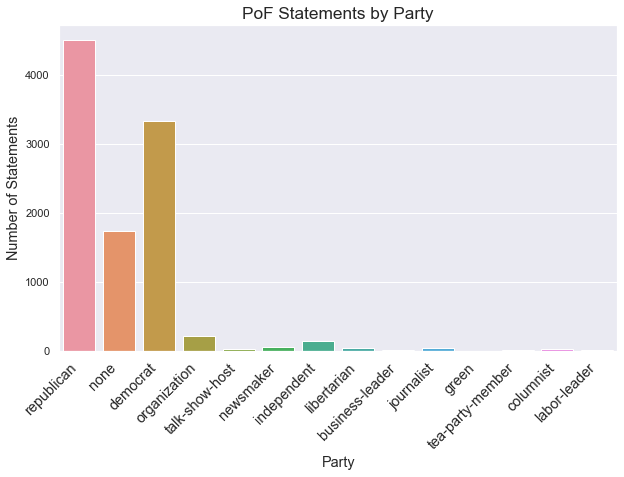

In [11]:
#visualize the counts of statements by party

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.countplot(
    data=raw_train, 
    x="party", order=raw_train['party'][raw_train['label']=='pants-fire'].value_counts().index)

ax.set_title('PoF Statements by Party', fontsize='x-large')
ax.set_xlabel('Party',fontsize='large')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light', fontsize='large')
ax.set_ylabel('Number of Statements',fontsize='large');

## Cleaning

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [13]:
from nltk.corpus import stopwords
import re
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [14]:
def drop_na(df):
    df = df.dropna(subset=['statement'], axis=0)
    return df

In [15]:
def drop_duplicated(df):
    df = df.drop_duplicates()
    return df

In [16]:
def label(df):
    df['label'] = df['label'].map({'true': 0,
                                     'mostly-true': 0,
                                     'half-true': 1,
                                     'false': 1,
                                     'barely-true': 1,
                                     'pants-fire': 1})
    return df

In [17]:
def clean(text):
    text=text.lower()
    stp=set(stopwords.words("english"))
    placesp = re.compile('[/(){}\[\]\|@,;]')
    removech= re.compile('[^0-9a-z #+_]')
    st=WordNetLemmatizer()
    text=re.sub(placesp,' ',text)
    text=re.sub(removech,' ',text)
    text=text.split()
    text=[w for w in text if not w in stp]
    text=[st.lemmatize(w) for w in text]
    text=" ".join(text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

In [18]:
def clean_df(df):
    df['statement'] = df['statement'].apply(lambda x: clean(x))
    return df

In [19]:
def drop_features(df):
    df = df[['statement','label']]
    return df

In [20]:
cleaning_pipeline = Pipeline(steps=[
    ('drop_na', FunctionTransformer(drop_na)),
    ('drop_duplicated', FunctionTransformer(drop_duplicated)),
    ('label', FunctionTransformer(label)),
    ('clean', FunctionTransformer(clean_df)),
    ('drop_features', FunctionTransformer(drop_features))
])

In [21]:
df_train_clean = cleaning_pipeline.fit_transform(raw_train)
df_val_clean = cleaning_pipeline.transform(raw_val)
df_test_clean = cleaning_pipeline.transform(raw_test)

In [32]:
%store df_train_clean
%store df_val_clean
%store df_test_clean

Stored 'df_train_clean' (DataFrame)
Stored 'df_val_clean' (DataFrame)
Stored 'df_test_clean' (DataFrame)


In [22]:
X_train_clean = df_train_clean['statement']
y_train_clean = df_train_clean['label']
X_val_clean = df_val_clean['statement']
y_val_clean = df_val_clean['label']
X_test_clean = df_test_clean['statement']
y_test_clean = df_test_clean['label']

In [23]:
df_train_clean.head()

,statement,label
0.0,say annies list political group support third ...,1
1.0,decline coal start started natural gas took st...,1
2.0,hillary clinton agrees john mccain voting give...,0
3.0,health care reform legislation likely mandate ...,1
4.0,economic turnaround started end term,1


In [24]:
df_train_clean['label'].value_counts()

1    6602
0    3638
Name: label, dtype: int64

In [25]:
from wordcloud import WordCloud

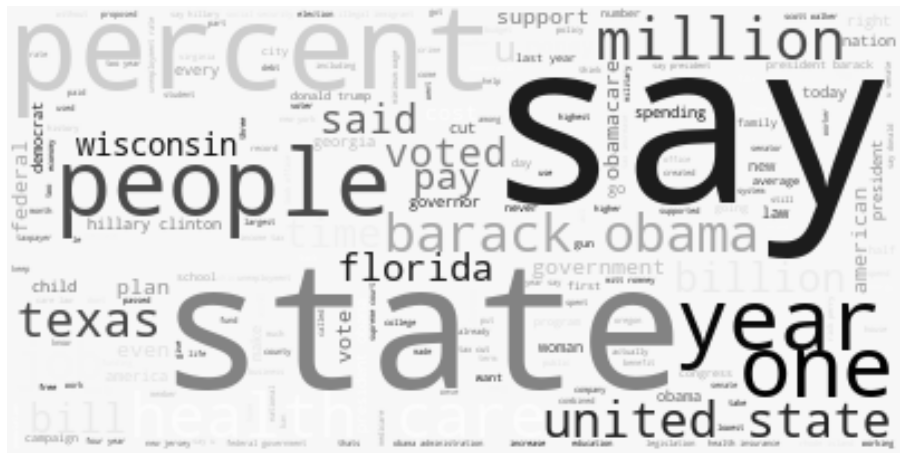

In [26]:
text = ' '.join(df_train_clean['statement'])

# Create and generate a word cloud image:
plt.figure(figsize=(16,12))
wordcloud = WordCloud(background_color='#f7f7f7', colormap='Greys_r', random_state=1).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [42]:
mnb = Pipeline([('cv', CountVectorizer()),
               ('mnb', MultinomialNB())])

lr = Pipeline([('Vectorizer', CountVectorizer()),
               ('LogisticReg', LogisticRegression())])

dtc = Pipeline([('Vectorizer', CountVectorizer()),
               ('DecisionTree', DecisionTreeClassifier())])

rf = Pipeline([('Vectorizer', CountVectorizer()),
               ('RandomFor', RandomForestClassifier())]) 

etc = Pipeline([('Vectorizer', CountVectorizer()),
               ('ExtraTrees', ExtraTreesClassifier())]) 

gbc = Pipeline([('Vectorizer', CountVectorizer()),
               ('gradiendboosting', GradientBoostingClassifier())])

svc = Pipeline([('Vectorizer', CountVectorizer()),
                ('SupportVec', SVC())])

sgd = Pipeline([('Vectorizer', CountVectorizer()),
                ('StochGrad', SGDClassifier())])

pac = Pipeline([('Vectorizer', CountVectorizer()),
                ('PassAgress', PassiveAggressiveClassifier())])

mlp = Pipeline([('Vectorizer', CountVectorizer()),
                ('MultiLayerPerc', MLPClassifier())])

In [43]:
models1 = [('MultiNomBa', mnb),
          ('LogisticReg', lr),
          ('DecTreeClass', dtc),
          ('RandomFor', rf),
          ('ExtraTrees', etc),
          ('GradBoost', gbc),
          ('SupportVec', svc),
          ('StochGrad', sgd),
          ('PassAgress', pac),
          ('MultiLayerPerc', mlp)]

In [44]:
def fit_models(models, X, y):
    '''
    Inputs a list of (name, model), X, y
    Fits data into models
    '''
    for name, model in models:
        model.fit(X, y)
    return None

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [72]:
def print_cm_with_labels(y_true, 
                         y_pred):
    '''
    Takes the true values and predicted values of a classifier and 
    plots a confusion matrix (normalized by predictions) using 
    a list of given display labels.
    '''
    disp_labels = ['True', 'Fake']
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=disp_labels)

    fig, ax = plt.subplots(figsize=(6,6))
    disp.plot(ax=ax)
    ax.grid(False)
    disp.ax_.set_xticklabels(disp_labels)
    return None

In [43]:
from sklearn.model_selection import cross_validate

In [101]:
def cross_validate_models(models, X, y, cv=5, scoring='accuracy', cm=False):
    '''
    Input: Models (name, model), X, y
    Optional: cross validation (cv), scoring, confusion matric (cm)
    Output: mean of models scores
    Default cross validation = 5
    Default scoring='accuracy'
    If cm=True, print models confusion matrices. Default=False
    '''
    fit_models(models, X, y)
    results = [(name, cross_validate(model, X, y, scoring=scoring, cv=cv)) for name, model, in models]
    scores = [(result[0], result[1]['test_score'].mean()) for result in results]
    if cm==True:
        for index, model in enumerate(models):
            print(f'{model}')
            print(f'Accuracy: {round(result[index][1], 4)}')
            print_cm_with_labels(y, model[1].predict(X))
    return scores

In [116]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
import numpy as np

In [160]:
def cross_validate_model(model_name, vectorizer, X, y, cv=5, scoring='accuracy', cm=False, params=False, gs_cv=5, ros=False, ngram_range=(1,1)):
    '''
    Input: Model name (str), Vectorizer (str) X, y
    Optional: cross validation (cv), scoring, confusion matric (cm),
              gridsearch parameters (params), gridsearch cv, random over sampling (ros)
    Output: model score
    Default cross validation = 5
    Default scoring='accuracy'
    If cm=True, print models confusion matrices. Default=False
    If params, performs gridsearch for best parameters
    If ros, performs random over sampling
    '''
    # instantiate model
    if model_name == 'mnb':
        model = MultinomialNB()
    elif model_name == 'lr':
        model = LogisticRegression()
    elif model_name == 'dtc':
        model = DecisionTreeClassifier()
    elif model_name == 'rf':
        model = RandomForestClassifier()
    elif model_name == 'etc':
        model = ExtraTreesClassifier()
    elif model_name == 'gbc':
        model = GradientBoostingClassifier()
    elif model_name == 'svc':
        model = SVC()
    elif model_name == 'sgd':
        model = SGDClassifier()
    elif model_name == 'pac':
        model = PassiveAggressiveClassifier()
    elif model_name == 'mlp':
        model = MLPClassifier()
    
    # create pipeline given vectorizer
    if vectorizer == 'cv':
        pipe = Pipeline([('cv', CountVectorizer(ngram_range=ngram_range)),
               (model_name, model)])
    elif vectorizer == 'tfidf':
        pipe = Pipeline([('tfidf', TfidfVectorizer(ngram_range=ngram_range)),
               (model_name, model)])
    elif vectorizer == 'hash':
        pipe = Pipeline([('hash', HashingVectorizer(ngram_range=ngram_range)),
               (model_name, model)])
    
    # perform random over sampling if ros
    if ros:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(np.array(X).reshape(-1, 1), y)
        X = pd.DataFrame(X).iloc[:,0]
    
    # fit the data
    pipe.fit(X, y)
    
    # performs gridsearch if params
    if params:
        grid_search = GridSearchCV(pipe, params, cv=gs_cv)
        grid_search.fit(X, y)
        print(grid_search.best_params_)
        
        result = cross_validate(grid_search, X, y, scoring=scoring, cv=cv)
        score = round(result['test_score'].mean(), 4)
        if cm==True:
            print(model_name)
            print(f'Accuracy: {score}')
            print_cm_with_labels(y, grid_search.predict(X))
    else:
        result = cross_validate(pipe, X, y, scoring=scoring, cv=cv)
        score = round(result['test_score'].mean(), 4)
        if cm==True:
            print(model_name)
            print(f'Accuracy: {score}')
            print_cm_with_labels(y, pipe.predict(X))
    return score

{'mnb__alpha': 0.001}
mnb
Pipeline(steps=[('cv', CountVectorizer()), ('mnb', MultinomialNB())])
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid=[{'mnb__alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6,
                                         0.8, 1]}])
Accuracy: 0.6963


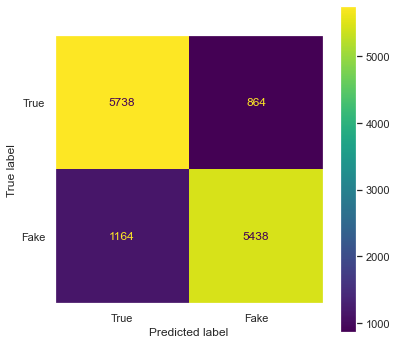

In [146]:
mnb_params =[{'mnb__alpha':[.001, .01, .05, .1, .2, .4, .6, .8, 1]}]

mnb_gs1 = cross_validate_model('mnb', 'cv', X_train_clean, y_train_clean, cv=5, scoring='accuracy', cm=True, params=mnb_params, ros=True)

In [180]:
mnb_gs0 = cross_validate_model('mnb', 'tfidf', X_train_clean, y_train_clean, ros=True, ngram_range=(1,10))

In [177]:
mnb_gs0

0.7386

In [179]:
mnb_gs0

0.7326

In [181]:
mnb_gs0

0.734

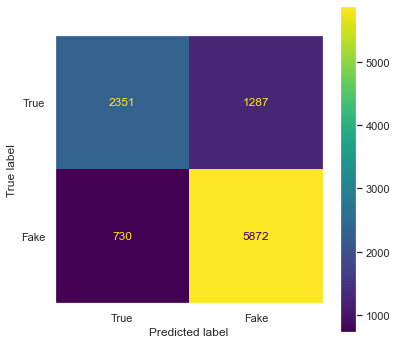

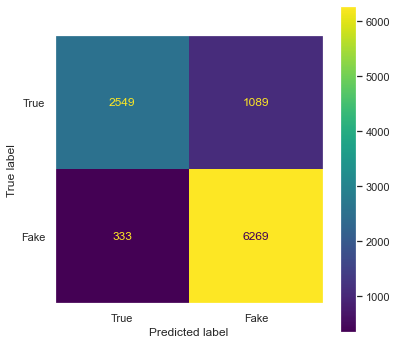

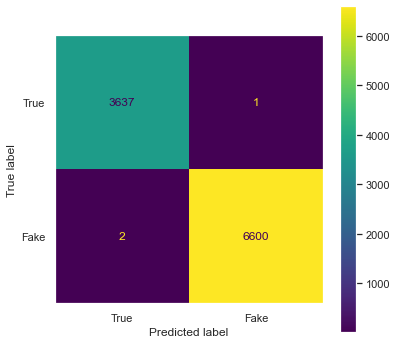

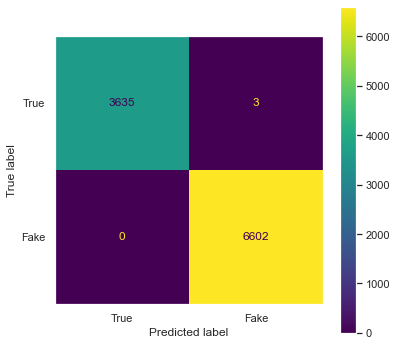

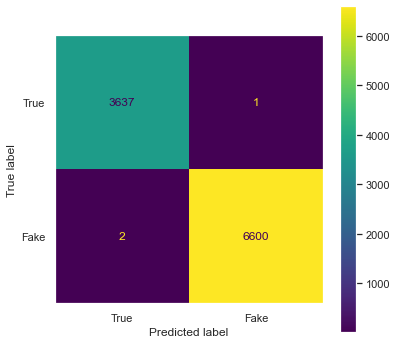

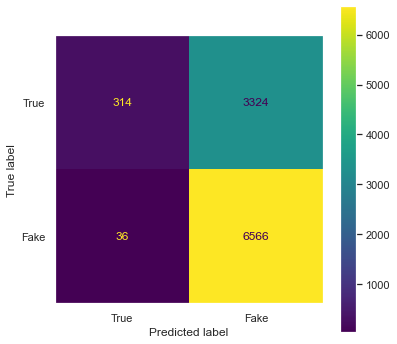

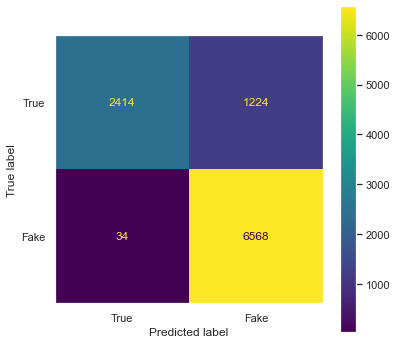

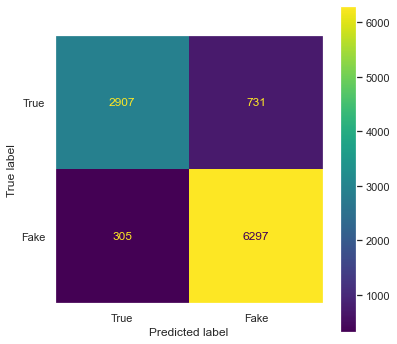

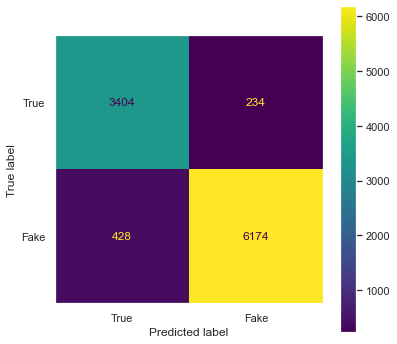

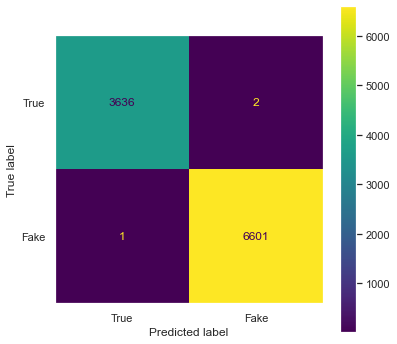

In [49]:
scores1 = cross_validate_models(models1, X_train_clean, y_train_clean, cv=2, cm=True)

In [51]:
scores1

[('MultiNomBa', 0.6271484375),
 ('LogisticReg', 0.616015625),
 ('DecTreeClass', 0.5860351562499999),
 ('RandomFor', 0.63984375),
 ('ExtraTrees', 0.6363281249999999),
 ('GradBoost', 0.64326171875),
 ('SupportVec', 0.6546875),
 ('StochGrad', 0.58564453125),
 ('PassAgress', 0.57021484375),
 ('MultiLayerPerc', 0.58955078125)]

In [57]:
mnb_tfidf = Pipeline([('cv', TfidfVectorizer()),
               ('mnb', MultinomialNB())])

lr_tfidf = Pipeline([('Vectorizer', TfidfVectorizer()),
               ('LogisticReg', LogisticRegression())])

dtc_tfidf = Pipeline([('Vectorizer', TfidfVectorizer()),
               ('DecisionTree', DecisionTreeClassifier())])

rf_tfidf = Pipeline([('Vectorizer', TfidfVectorizer()),
               ('RandomFor', RandomForestClassifier())]) 

etc_tfidf = Pipeline([('Vectorizer', TfidfVectorizer()),
               ('ExtraTrees', ExtraTreesClassifier())]) 

gbc_tfidf = Pipeline([('Vectorizer', TfidfVectorizer()),
               ('gradiendboosting', GradientBoostingClassifier())])

svc_tfidf = Pipeline([('Vectorizer', TfidfVectorizer()),
                ('SupportVec', SVC())])

sgd_tfidf = Pipeline([('Vectorizer', TfidfVectorizer()),
                ('StochGrad', SGDClassifier())])

pac_tfidf = Pipeline([('Vectorizer', TfidfVectorizer()),
                ('PassAgress', PassiveAggressiveClassifier())])

mlp_tfidf = Pipeline([('Vectorizer', TfidfVectorizer()),
                ('MultiLayerPerc', MLPClassifier())])

In [58]:
models2 = [('MultiNomBa', mnb_tfidf),
          ('LogisticReg', lr_tfidf),
          ('DecTreeClass', dtc_tfidf),
          ('RandomFor', rf_tfidf),
          ('ExtraTrees', etc_tfidf),
          ('GradBoost', gbc_tfidf),
          ('SupportVec', svc_tfidf),
          ('StochGrad', sgd_tfidf),
          ('PassAgress', pac_tfidf),
          ('MultiLayerPerc', mlp_tfidf)]

In [59]:
scores2 = cross_validate_models(models2, X_train_clean, y_train_clean, cv=2)

In [60]:
scores2

[('MultiNomBa', 0.64658203125),
 ('LogisticReg', 0.64765625),
 ('DecTreeClass', 0.57373046875),
 ('RandomFor', 0.641796875),
 ('ExtraTrees', 0.63984375),
 ('GradBoost', 0.6466796875),
 ('SupportVec', 0.65244140625),
 ('StochGrad', 0.6181640625),
 ('PassAgress', 0.572265625),
 ('MultiLayerPerc', 0.58046875)]